Importing packages

Dataset details

1.id: the unique identifier of each diamond

2.carat: Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

3.cut: Quality of Diamond Cut

4.color: Color of Diamond

5.clarity: Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

6.depth: The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface)

7.table: A diamond's table is the facet which can be seen when the stone is viewed face up.

8.x : Diamond X dimension

9.y: Diamond Y dimension

10.z: Diamond Z dimension

11.Price

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('data\gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [27]:
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [5]:
df.shape

(193573, 11)

Check Missing values

In [6]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are no missing values

Check dupliates

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

To check the categories of each categorical variable 

In [9]:
df.describe(include=['O'])

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [10]:
print("The categories in Cut are")
print(df['cut'].unique())
print("The categories in color are")
print(df['color'].unique())
print("The categories in clarity are")
print(df['clarity'].unique())




The categories in Cut are
['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
The categories in color are
['F' 'J' 'G' 'E' 'D' 'H' 'I']
The categories in clarity are
['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


In [11]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


dropping the id column

In [12]:
df=df.drop('id',axis=1)

In [13]:
numerical_features=df.select_dtypes(exclude='O')
categorical_features=df.select_dtypes(include='O')
print("Numerical features")
print(numerical_features.columns)
print("categorical features")
print(categorical_features.columns)

Numerical features
Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical features
Index(['cut', 'color', 'clarity'], dtype='object')


In [14]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


Exploring the data

Distribution of carat column

<Axes: xlabel='carat', ylabel='Count'>

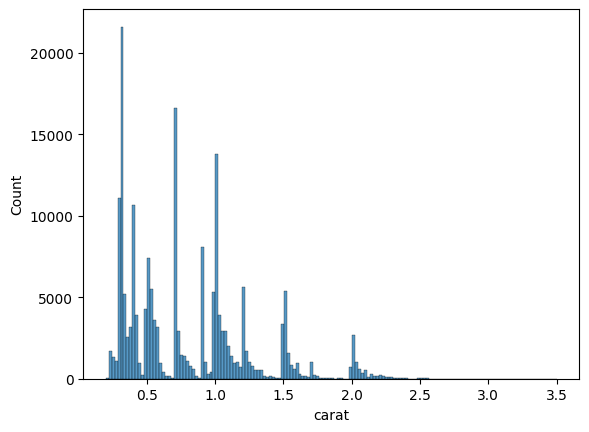

In [15]:
sns.histplot(df['carat'])

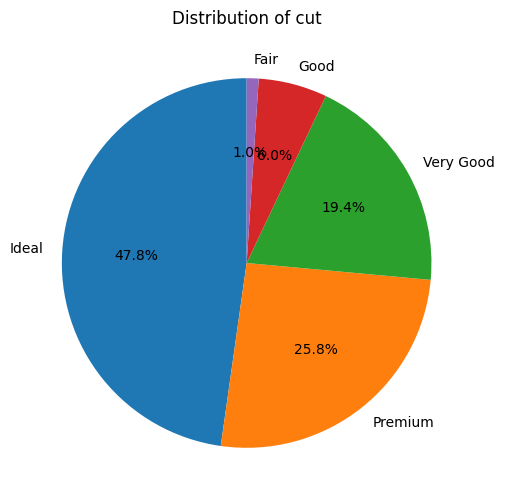

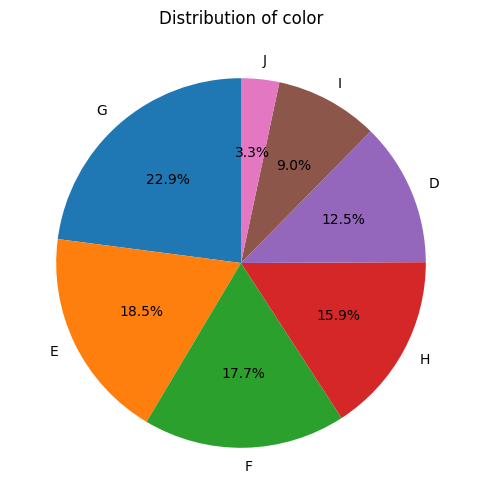

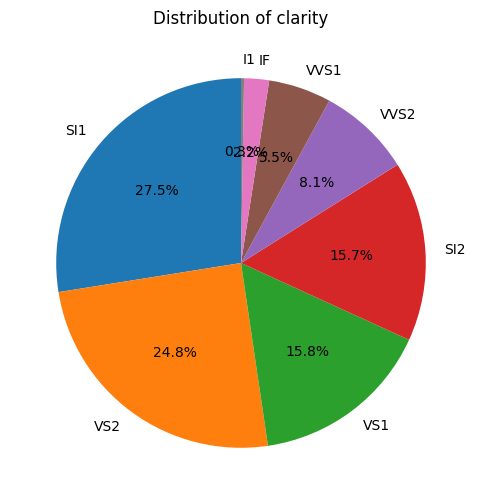

In [16]:

for i in categorical_features.columns:
    plt.figure(figsize=(6, 6)) 
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.1f%%', startangle=90)
    plt.title(f"Distribution of {i}")
    plt.show()


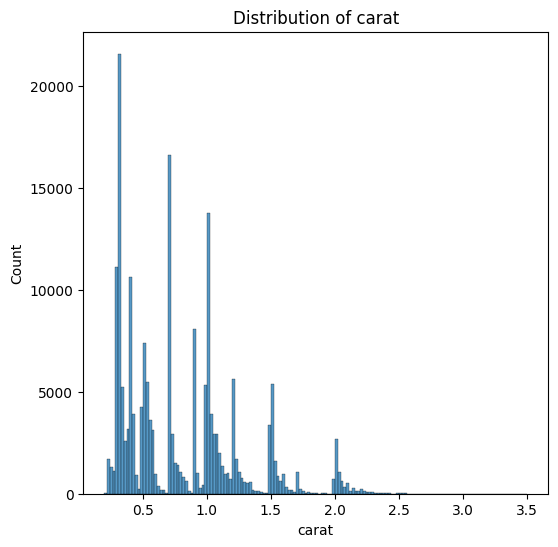

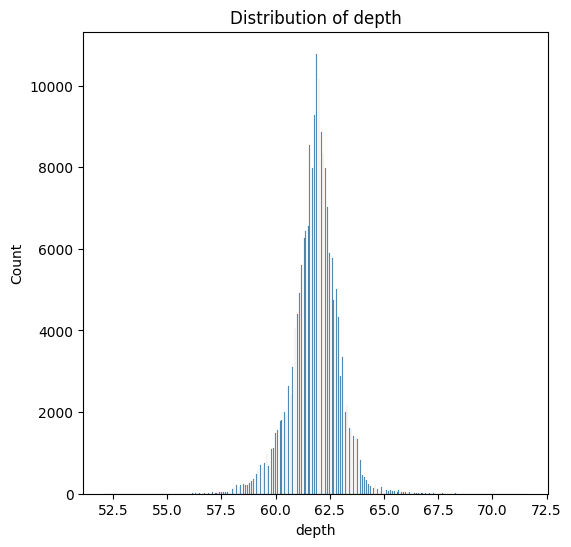

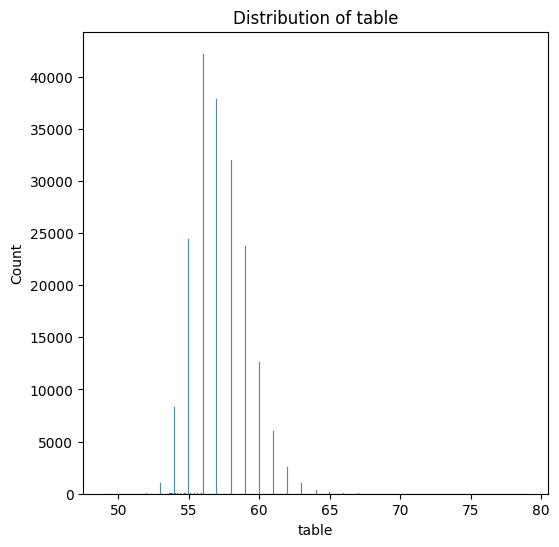

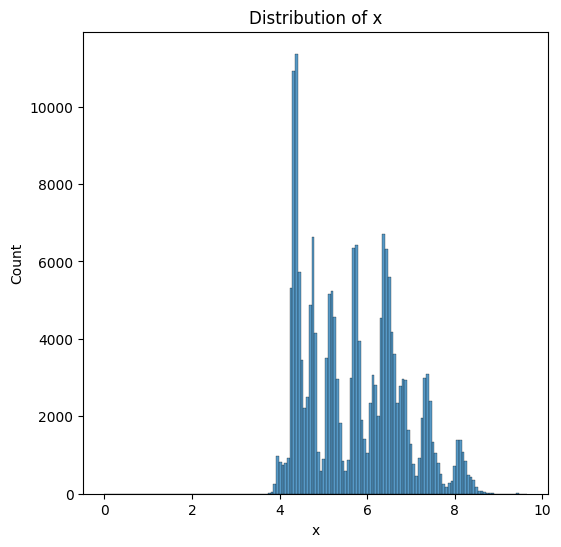

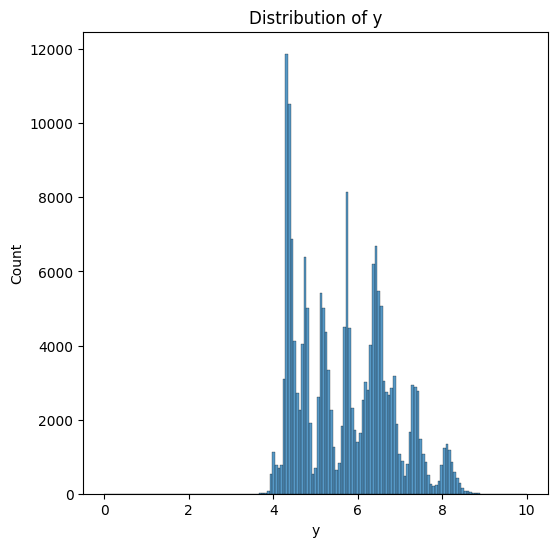

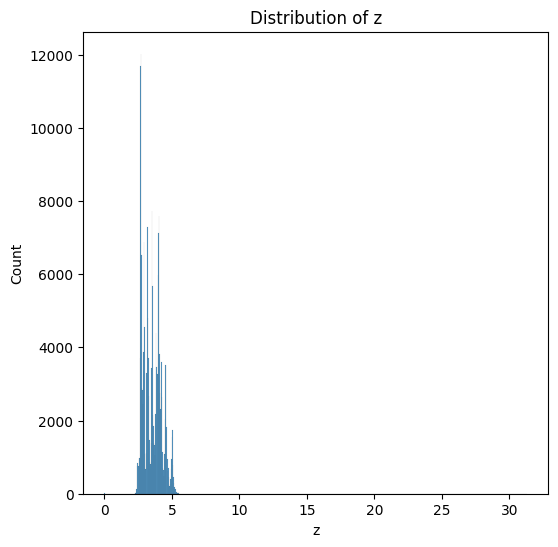

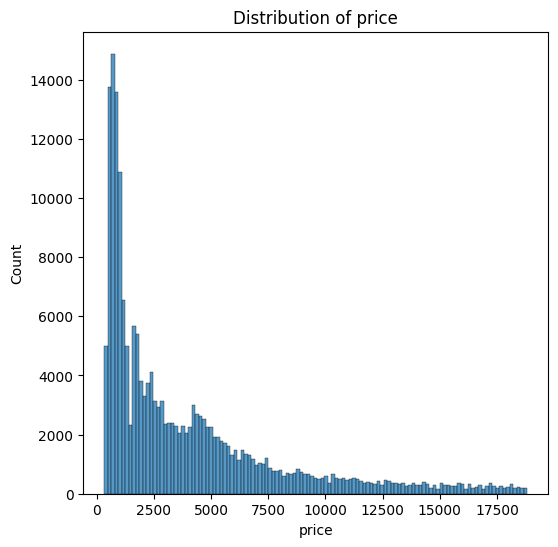

In [17]:
for i in numerical_features.columns:
    plt.figure(figsize=(6, 6)) 
    sns.histplot(df[i])
    plt.title(f"Distribution of {i}")
    plt.show()

relation between cut and price

Text(0, 0.5, 'Average Price')

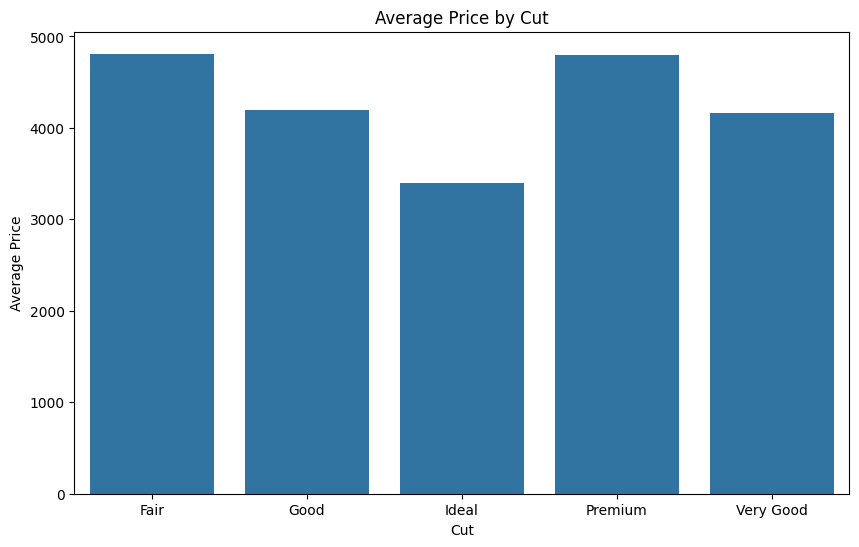

In [18]:
mean_price_cut = df.groupby(['cut'])['price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(mean_price_cut)
plt.title('Average Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Average Price')

if we observe the barplot

the premium cut and fair cut have higher prices

the ideal cut daimonds are of low cost

the good and very good cuts are mediumly priced

relation between color and price

Text(0, 0.5, 'Average Price')

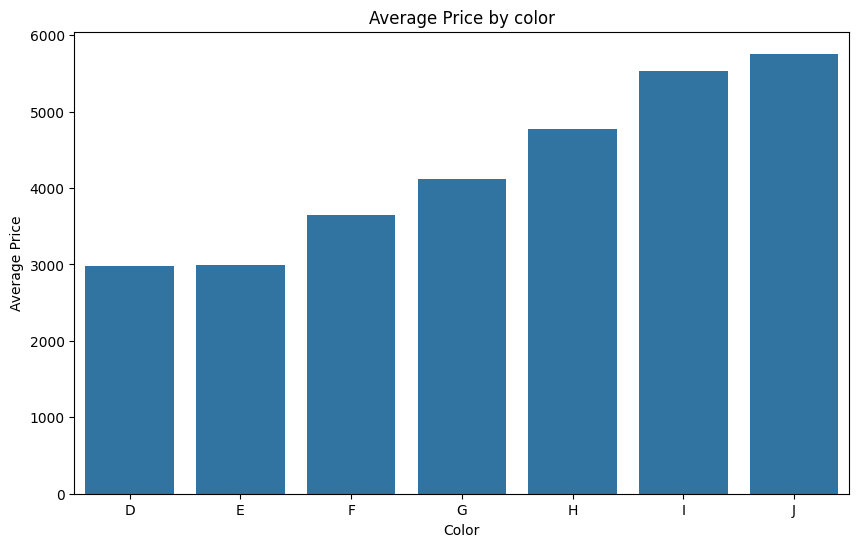

In [19]:
mean_price_color = df.groupby(['color'])['price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(mean_price_color)
plt.title('Average Price by color')
plt.xlabel('Color')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

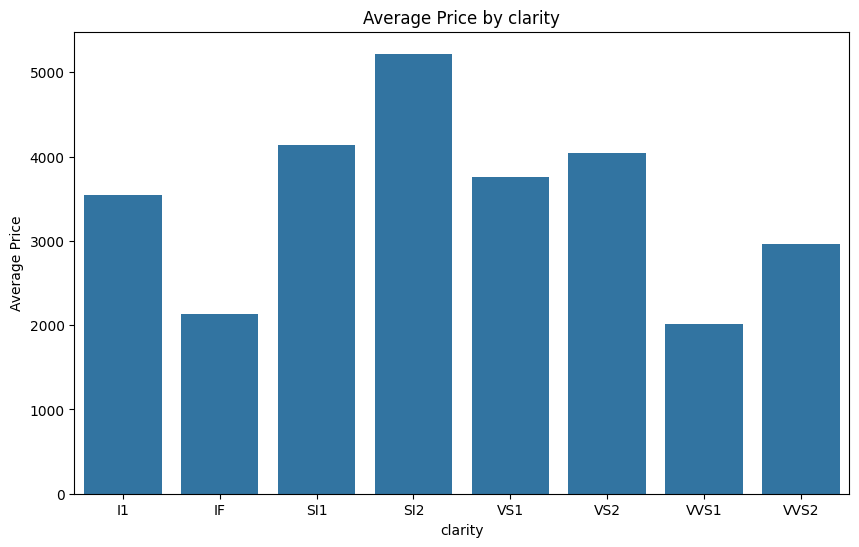

In [26]:
mean_price_clarity = df.groupby(['clarity'])['price'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(mean_price_clarity)
plt.title('Average Price by clarity')
plt.xlabel('clarity')
plt.ylabel('Average Price')

SI2 clarity has the highest average price

IF and VVSI clarity has lowest average price


Text(0, 0.5, 'price')

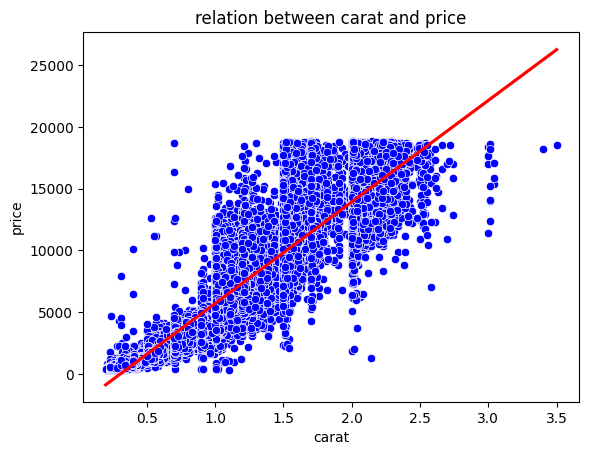

In [21]:
sns.scatterplot(x=df['carat'],y=df['price'],color='blue')
sns.regplot(x=df['carat'],y=df['price'],color='red',scatter=False)
plt.title('relation between carat and price')
plt.xlabel('carat')
plt.ylabel('price')

It shows a increasing relation between carat and price

Text(0, 0.5, 'price')

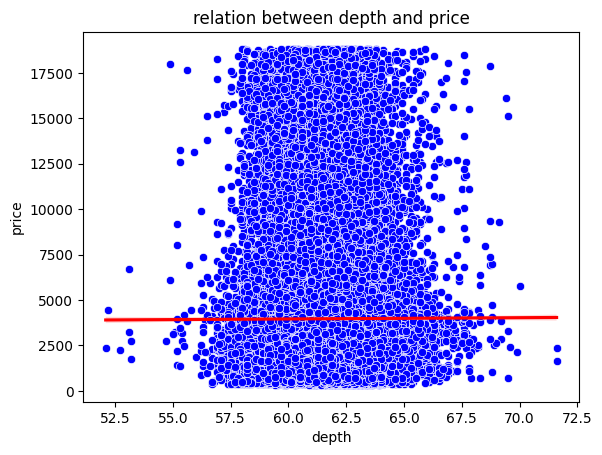

In [22]:
sns.scatterplot(x=df['depth'],y=df['price'],color='blue')
sns.regplot(x=df['depth'],y=df['price'],color='red',scatter=False)
plt.title('relation between depth and price')
plt.xlabel('depth')
plt.ylabel('price')

there is no relation between depth and price

Text(0, 0.5, 'price')

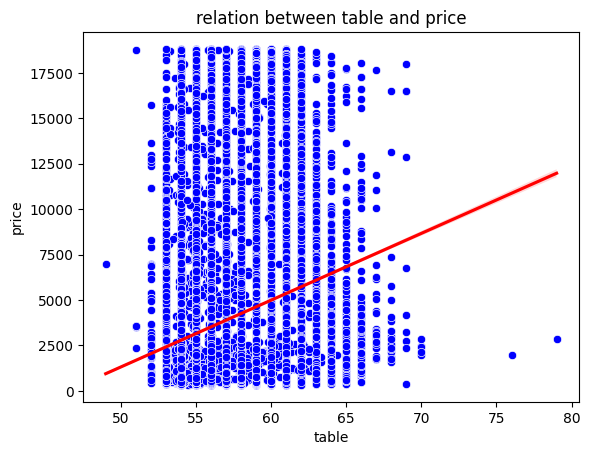

In [23]:
sns.scatterplot(x=df['table'],y=df['price'],color='blue')
sns.regplot(x=df['table'],y=df['price'],color='red',scatter=False)
plt.title('relation between table and price')
plt.xlabel('table')
plt.ylabel('price')

It shows a increasing relation between table and price

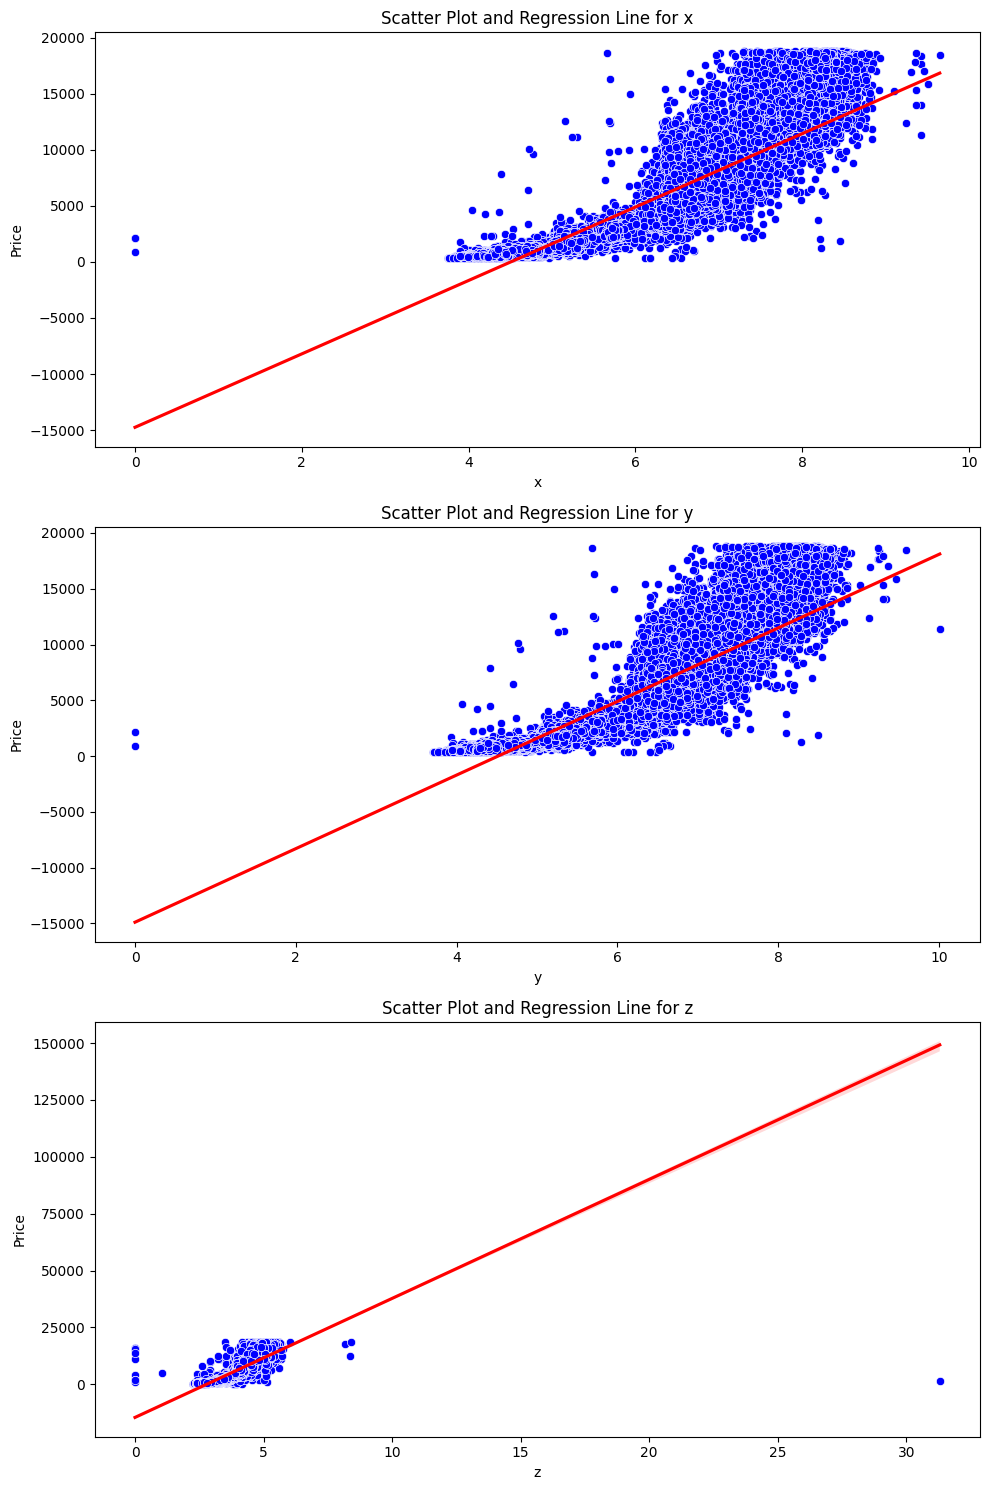

In [24]:
features = ['x', 'y', 'z']
fig, axes = plt.subplots(len(features), 1, figsize=(10, 5 * len(features)))
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df['price'], color='blue', ax=axes[i])
    sns.regplot(x=df[feature], y=df['price'], color='red', scatter=False, ax=axes[i])
    axes[i].set_title(f'Scatter Plot and Regression Line for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')
plt.tight_layout()
plt.show()

we can observe that the x,y,z features have increasing relationship with price

pairplot for multivariate analysis

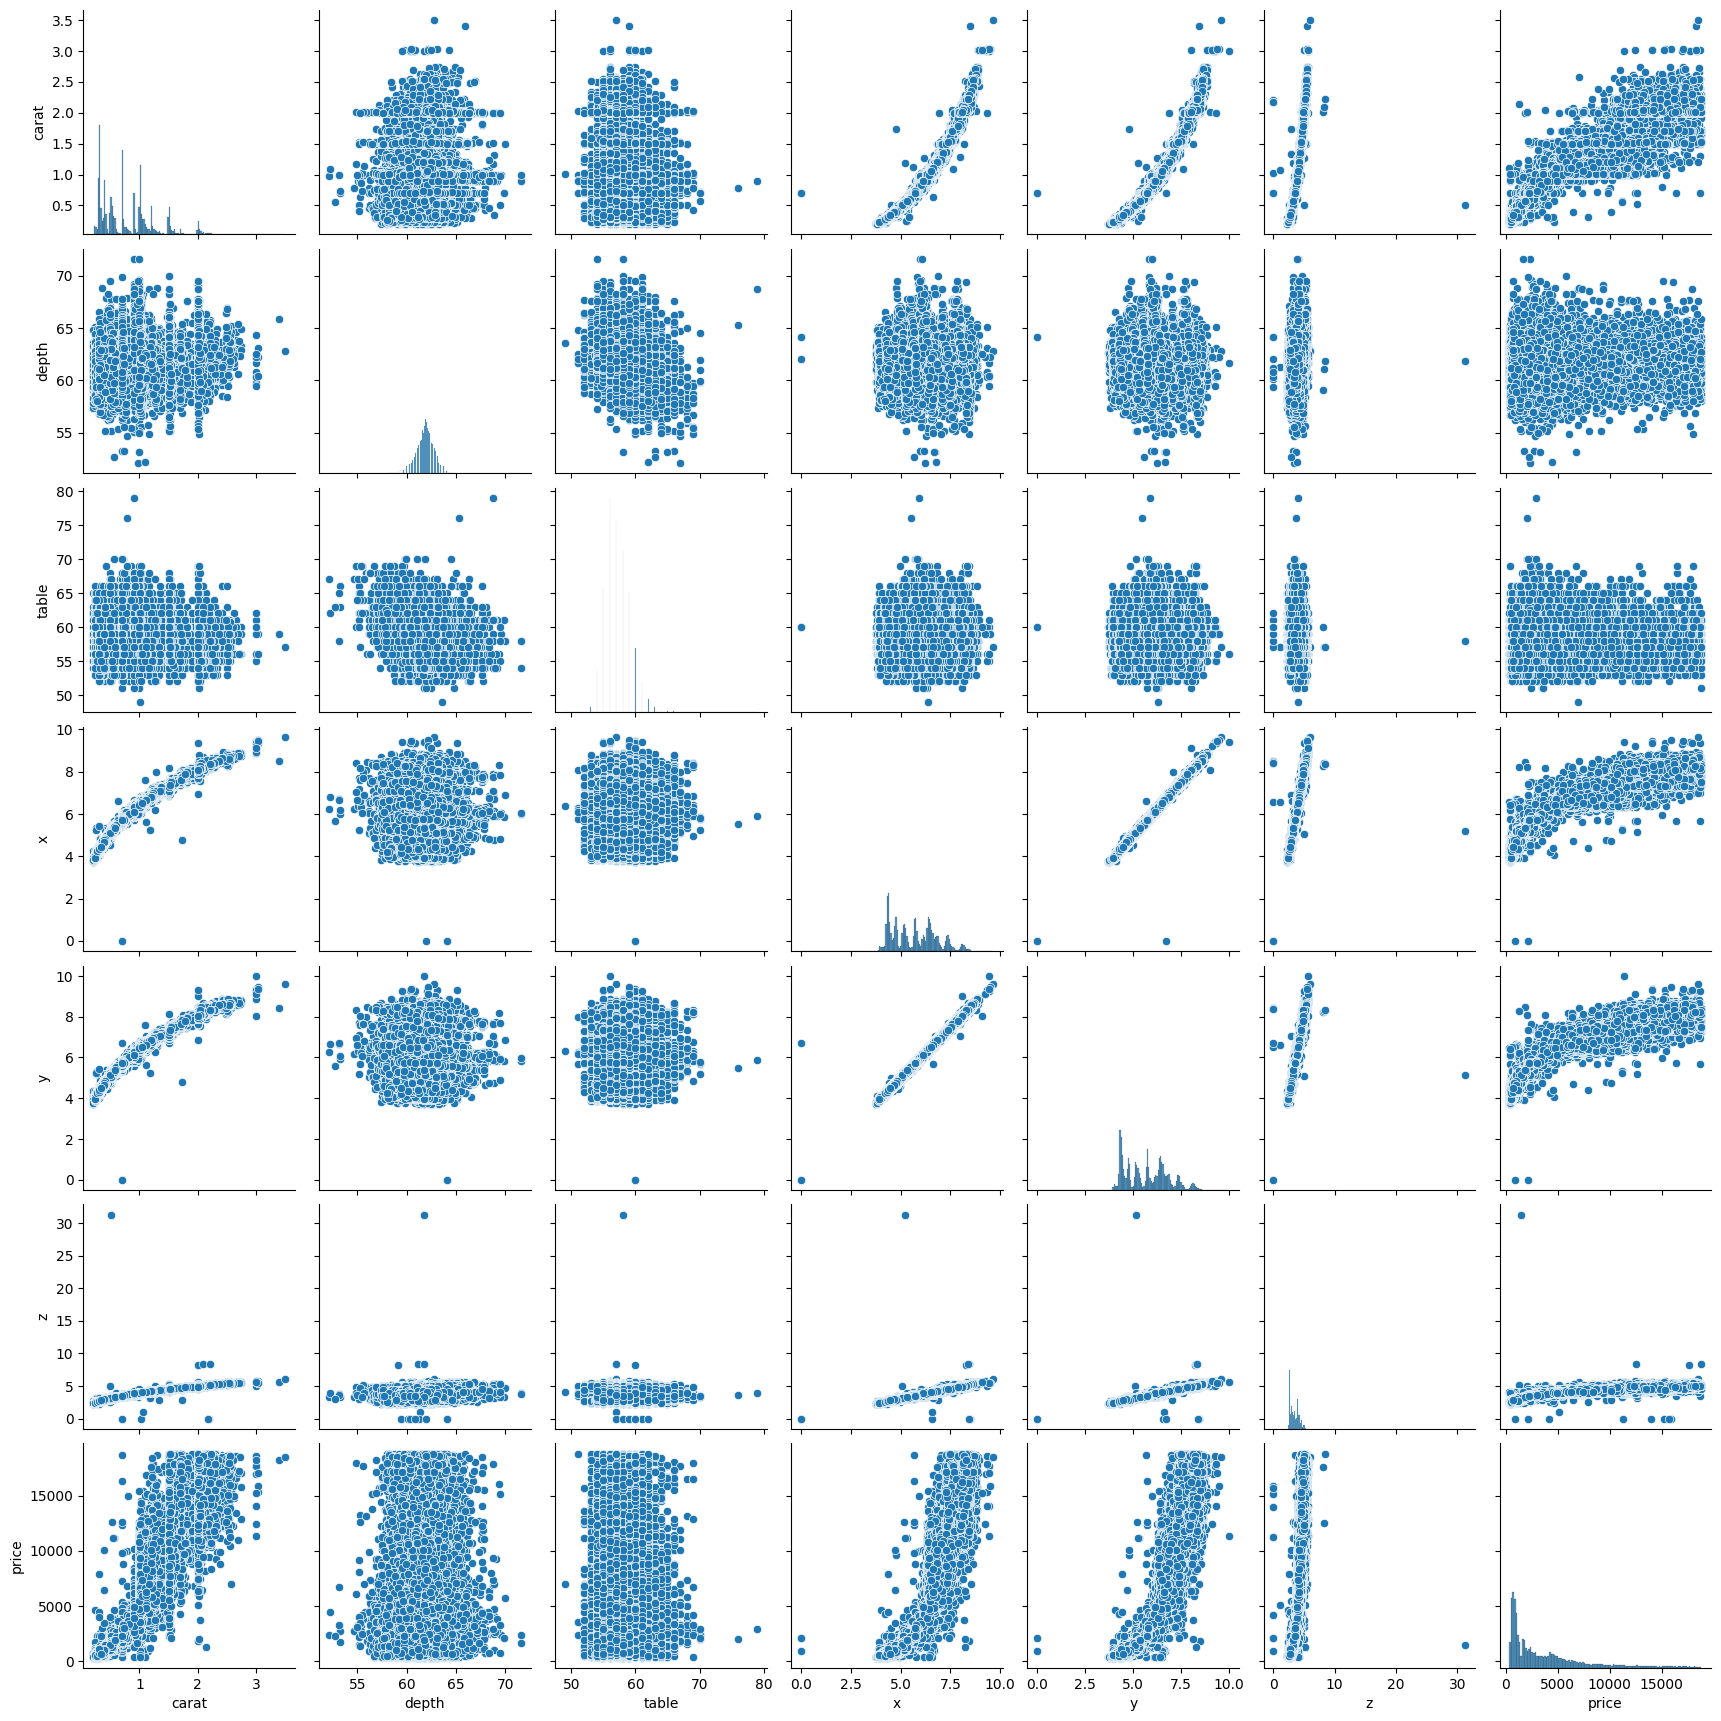

In [25]:
sns.pairplot(df)